In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical
import logging
logging.getLogger('tensorflow').disabled = True


# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Loading the fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels
#Traning
x_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Test
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

x_train = x_train / 255.00
x_test = x_test / 255.00

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

Shape of Training Image Data: (10000, 28, 28, 1)
Shape of Training Class Data: (10000, 5)
Shape of Test Image Data: (5000, 28, 28, 1)
Shape of Test Class Data: (5000, 5)


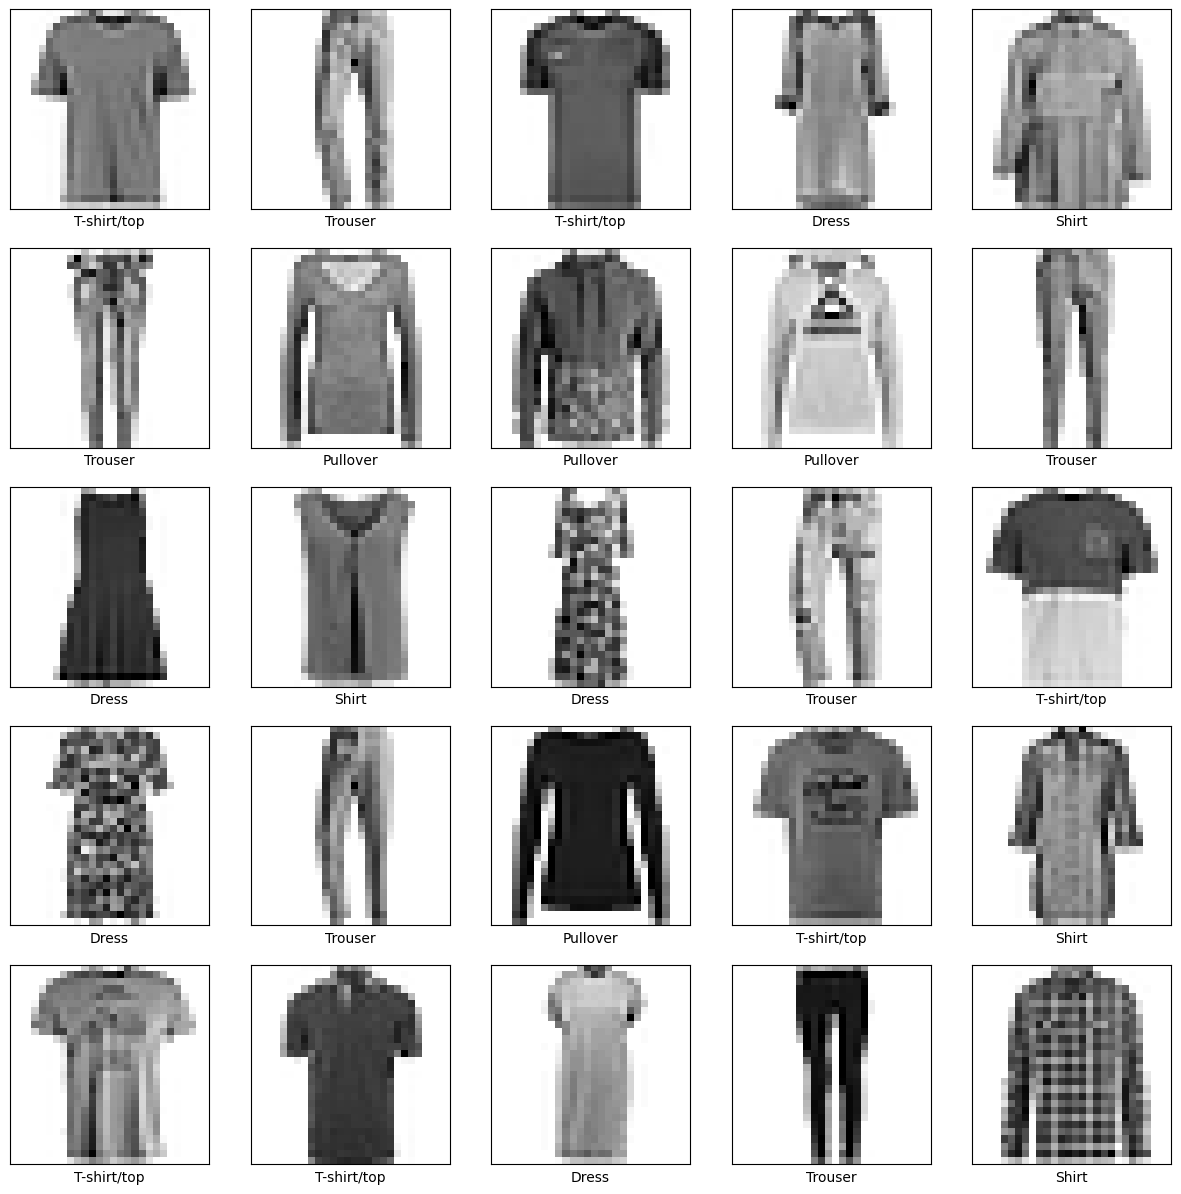

In [4]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    # Convert one-hot encoded label back to integer
    class_index = np.argmax(y_train[i])
    
    plt.xlabel(class_names[class_index])

plt.show()


In [5]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# We start with a convolutional layer this will extract features from 
# the input images by sliding a convolution filter over the input image, 
# resulting in a feature map.
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    )
) 

# The next layer we will add is a Maxpooling layer.
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )
)
          
# We'll now add a dropout layer.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

# Output from the previous layer is a 3D tensor. This must be flattened to a 1D 
# vector before being fed to the Dense Layers.
model.add(
    tf.keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features 
# to the required class.
model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

# Final layer with 5 outputs and a softmax activation.
model.add(
    tf.keras.layers.Dense(
        units=5,
        activation='softmax'
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Display a summary of the model's structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

In [6]:
# Add an empty color dimension as the Convolutional net is expecting this
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

# Train the CNN on the training data
history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, y_train,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=300, 

      # An epoch is an iteration over the entire training data.
      epochs=30, 

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      validation_data=(x_test, y_test), 

      verbose=1) 

Epoch 1/30
34/34 [==============================] - 1s 30ms/step - loss: 0.7684 - accuracy: 0.7083 - val_loss: 0.5660 - val_accuracy: 0.7846
Epoch 2/30
34/34 [==============================] - 1s 28ms/step - loss: 0.4859 - accuracy: 0.8228 - val_loss: 0.4748 - val_accuracy: 0.8268
Epoch 3/30
34/34 [==============================] - 1s 27ms/step - loss: 0.4149 - accuracy: 0.8433 - val_loss: 0.4265 - val_accuracy: 0.8440
Epoch 4/30
34/34 [==============================] - 1s 27ms/step - loss: 0.3771 - accuracy: 0.8558 - val_loss: 0.4008 - val_accuracy: 0.8570
Epoch 5/30
34/34 [==============================] - 1s 27ms/step - loss: 0.3522 - accuracy: 0.8668 - val_loss: 0.3914 - val_accuracy: 0.8552
Epoch 6/30
34/34 [==============================] - 1s 28ms/step - loss: 0.3356 - accuracy: 0.8726 - val_loss: 0.3675 - val_accuracy: 0.8668
Epoch 7/30
34/34 [==============================] - 1s 28ms/step - loss: 0.3121 - accuracy: 0.8846 - val_loss: 0.3669 - val_accuracy: 0.8628
Epoch 8/30
34

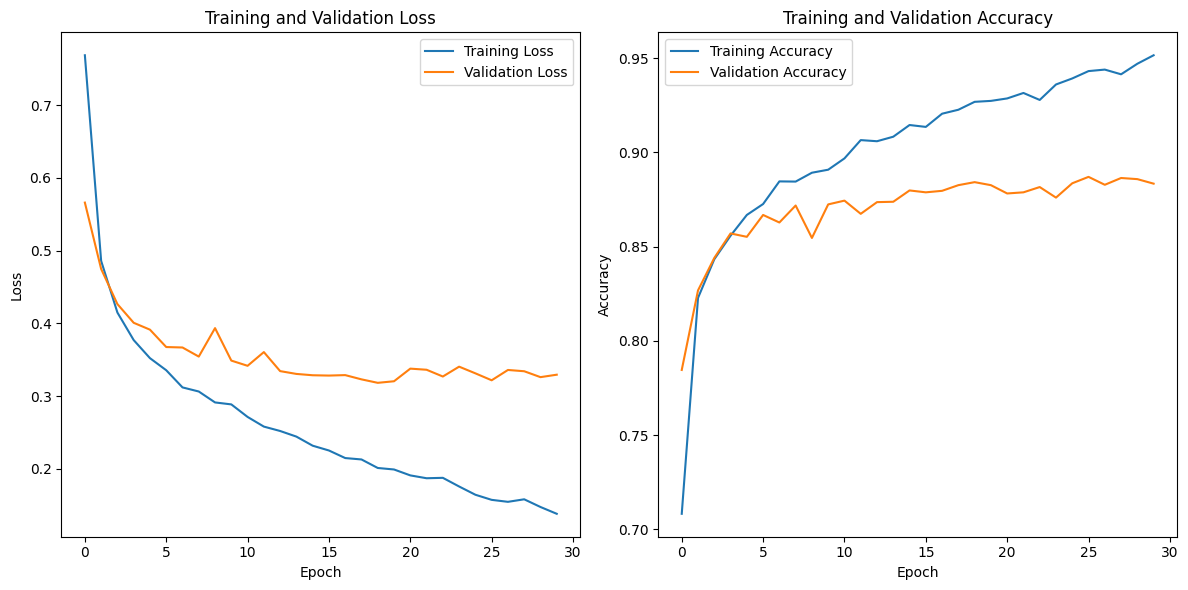

In [7]:
# Access the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Get Model Predictions for test data
predicted_probabilities = model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=class_names))


157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.82      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.91      0.87      0.89      1000
       Dress       0.90      0.94      0.92      1000
       Shirt       0.75      0.81      0.78      1000

    accuracy                           0.88      5000
   macro avg       0.89      0.88      0.88      5000
weighted avg       0.89      0.88      0.88      5000

